# 텍스트 마이닝 팀프로젝트 N팀 
---
- __조원__ : 김해리(), 안지은(20203620), 양지현(), 유동근(), 정은지() 

# 0. 개요
---
개요 입력



## 0-1. 한글 폰트 처리 및 라이브러리 임포트

### kmeans_to_pyLDAvis 설치하기
- pyLDAvis : LDA의 시각화를 위해 제작된 패키지이므로, 이를 K-means 값으로도 활용하기 위해선 변환 패키지 필요
- kmeans_to_pyLDAvis : Kmeans의 결과물을 pyLDAvis 통해 나타낼 수 있도록 변환해주는 패키지
- 제작자 깃허브 : https://github.com/lovit/kmeans_to_pyLDAvis

__! 설치 전 !__
- pyLDAvis, sklearn,scipy, collections 설치 -> 설치가 안 되어 있으면 import 단계부터 에러 발생

__설치 방법__
- jupyter 이용 시 : anaconda powershell prompt 열고 pip install git+https://github.com/An-JIeun/moGakCo.git 입력
- colab 이용 시 : !pip install git+https://github.com/An-JIeun/moGakCo.git

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install sklearn
!pip install pyLDAvis
!pip install soyclustering

#colab 이용 시
#!pip install git+https://github.com/An-JIeun/moGakCo.git

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import re
import pandas as pd
import numpy as np
import math
from math import sqrt

# 데이터 크롤링
import bs4
import time
import urllib
import requests
import selenium
import numpy as np 
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
from urllib.request import urlopen 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# 시각화 라이브러리
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from collections import Counter
import  numpy as np
from PIL import Image
import plotly 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 폰트 설정
font_path1 = r'C:/Windows/Fonts/NanumGothic.ttf' # 기본 matplotlib 폰트
font_path2 = r'C:/Windows/Fonts/bmdohyeon_ttf.ttf' # 배민 도현체 - 워드클라우드에 사용 
font = font_manager.FontProperties(fname = font_path1).get_name()
rc('font',family = font)


# 클러스터링
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from soyclustering import SphericalKMeans # sphericalKmeans

# pyldavis 관련
import pyLDAvis
import kmeans_to_pyLDAvis
from kmeans_to_pyLDAvis import kmeans_to_prepared_data


# 1. 데이터 크롤링
---

## 1-1. 국립중앙도서관 오아시스 컬렉션 88건 크롤링

In [ ]:
wd = webdriver.Chrome(r'D:\chromedriver.exe')
wd.get('https://www.nl.go.kr/oasis/')
sleep(2)
wd.maximize_window()
sleep(0.5)

wd.find_element(By.XPATH, '//*[@id="gnb2"]/a').click()
wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[1]/div/form/div/select[1]/option[5]').click()
wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[1]/div/form/div/a').click()

i = 1

title = []
happen = []
gather = []
related = []
gather_num1 = []
gather_num2 = []
gather_num3 = []
gather_num4 = []
content = []

for i in range(1, 89) : 
    wd.find_element(By.XPATH, '//*[@id="moreListWrap"]/li[' + str(i) + ']').click()
    title1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[1]/h4').text
    happen1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[1]/div/div[2]/span/span').text
    gather1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[2]/div/div[2]/span').text
    related1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[3]/div/div[2]/a/span').text
    gather_num1_1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[4]/div/div[2]/span/a[1]').text
    gather_num2_1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[4]/div/div[2]/span/a[2]').text
    gather_num3_1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[4]/div/div[2]/span/a[3]').text
    gather_num4_1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[1]/div/div[2]/ul/li[4]/div/div[2]/span/a[4]').text
    content1 = wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[2]/div[2]/div').text

    title.append(title1)
    happen.append(happen1)
    gather.append(gather1)
    related.append(related1)
    gather_num1.append(gather_num1_1)
    gather_num2.append(gather_num2_1)
    gather_num3.append(gather_num3_1)
    gather_num4.append(gather_num4_1)
    content.append(content1)
    
    wd.back()
    sleep(1)

    if i >= 60 : 
        wd.find_element(By.XPATH, '//*[@id="main_content"]/div/div[3]/a').click()
        sleep(1)

C:\Users\bigvalue\AppData\Local\Temp\ipykernel_13236\2400688232.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(r'D:\chromedriver.exe')


## 1-2. 수집 데이터 병합 및 저장

In [ ]:
crawling_list = ['title', 'happen', 'gather', 'related', 'gather_num1', 'gather_num2', 'gather_num3', 'gather_num4', 'content']

title = pd.DataFrame(title)
happen = pd.DataFrame(happen)
gather = pd.DataFrame(gather)
related = pd.DataFrame(related)
gather_num1 = pd.DataFrame(gather_num1)
gather_num2 = pd.DataFrame(gather_num2)
gather_num3 = pd.DataFrame(gather_num3)
gather_num4 = pd.DataFrame(gather_num4)
content = pd.DataFrame(content)

content.columns = ['내용']
content['출처'] = content['내용'].str.split('출처').str[1]
content['내용'] = content['내용'].str.split('출처').str[0]

data = pd.concat([title, happen, gather, related, gather_num1, gather_num2, gather_num3, gather_num4, content], axis = 1)
data.columns = ['제목', '발생기간', '수집기간', '관련주제', '수집건수_웹사이트', '수집건수_문서', '수집건수_동영상', '수집건수_이미지', '내용', '출처']

data.to_excel(r'C:\Users\bigvalue\Desktop\data.xlsx', index = False)

In [ ]:
oasis = pd.read_excel('data.xlsx')
oasis

,제목,발생기간,수집기간,관련주제,수집건수_웹사이트,수집건수_문서,수집건수_동영상,수집건수_이미지,내용,출처
0,2022년 20대 대통령선거(20대 대선),2022년 03월 09일,2021년 09월 01일 ~ 2022년 02월 26일,사회과학 > 행정학,210,0,0,0,제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 ...,>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/vt/e...
1,제16회 도쿄 패럴림픽,2021년 08월 24일,2021년 07월 05일 ~ 2021년 11월 07일,"예술 > 오락, 스포츠",261,0,0,0,2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로...,>\n국제패럴림픽위원회(https://www.paralympic.org/)\n대한장...
2,2021년 대한민국 재보궐선거 (4·7 재보궐선거),2021년 07월 23일,2021년 07월 05일 ~ 2021년 11월 17일,사회과학 > 행정학,271,0,0,0,"2020년 7월 10일 박원순 전 서울시장의 임기 중 사망, 오거돈 전 부산시장 자...",>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/nec/...
3,제32회 2020 도쿄올림픽,2021년 07월 23일,2020년 11월 03일 ~ 2021년 11월 17일,"예술 > 오락, 스포츠",511,0,0,0,2021년 7월 23일부터 8월 8일까지 일본 도쿄에서 열린 제32회 하계올림픽으로...,>\n도쿄올림픽 공식홈페이지(https://olympics.com/ko/olympi...
4,문화콘텐츠,2021년 01월 01일,2022년 01월 27일 ~ 2022년 12월 31일,"예술 > 공연예술, 매체예술",603,0,0,0,“한류가 아시아와 그 너머 다른 국가들에서도 한국의 문화적 영향력을 확산시켜 한국을...,>\n한국콘텐츠진흥원(https://www.kocca.kr/cop/bbs/view/...
...,...,...,...,...,...,...,...,...,...,...
83,가습기 살균제 사건,2001년 01월 01일,2016년 05월 26일 ~ 2017년 07월 12일,"사회과학 > 사회학, 사회문제","1,063",395,49,24,"가습기살균제 사건은 대한민국에서 일어난 세계 최초의 바이오사이드(Biocide, 살...",">\n- 가습기 살균제 건강피해 사건 백서: 사건인지부터 피해 1차 판정까지, 보건..."
84,2000 남북정상회담,2000년 06월 13일,2018년 09월 19일 ~ 2018년 09월 19일,사회과학 > 정치학,4,5,5,20,1998년 2월 출범한 국민의 정부는 세계적인 탈냉전 흐름에 따라 화해협력정책이 한...,>\n행정안전부 국가기록원 홈페이지 - 기록정보콘텐츠\n(http://www.arc...
85,도서관,2000년 01월 01일,2021년 08월 01일 ~ 2022년 02월 26일,총류 > 문헌정보학,329,0,0,0,도서관은 도서 및 기타 자료를 수집·정리·보존하여 독자에게 독서·조사·연구·참고·취...,>\n다음백과(https://100.daum.net/encyclopedia/view...
86,비엔날레,1995년 09월 20일,2019년 06월 26일 ~ 2019년 10월 31일,예술 > 예술,24,0,0,0,'비엔날레'는 원래 이탈리아어로 '2년에 한 번'이라는 뜻으로 미술 분야에서는 2년...,">\n비엔날레 (세계미술용어사전, 월간미술 https://monthlyart.com/)"


# 2. 데이터 전처리
---

In [ ]:
# '수집기간' 컬럼을 시작일과 종료일로 나누기
date_split = oasis.수집기간.str.split('~')

start = [first[0].strip() for first in date_split]
end = [second[1].strip() for second in date_split]

oasis.insert(2, '수집기간:시작일', start)
oasis.insert(3, '수집기간:종료일', end)
oasis = oasis.drop('수집기간', axis=1)

In [ ]:
# '발생기간'과 '수집기간(시작일, 종료일)' 컬럼 날짜 형식으로 바꾸기
chars1 = ['년 ', '월 ']
for char in chars1:
  oasis['발생기간'] = oasis['발생기간'].str.replace(char, '-')
  oasis['수집기간:시작일'] = oasis['수집기간:시작일'].str.replace(char, '-')
  oasis['수집기간:종료일'] = oasis['수집기간:종료일'].str.replace(char, '-')

chars2 = ['일', ' ']
for char in chars2:
  oasis['발생기간'] = oasis['발생기간'].str.replace(char, '')
  oasis['수집기간:시작일'] = oasis['수집기간:시작일'].str.replace(char, '')
  oasis['수집기간:종료일'] = oasis['수집기간:종료일'].str.replace(char, '')

oasis['발생기간'] = pd.to_datetime(oasis['발생기간'])
oasis['수집기간:시작일'] = pd.to_datetime(oasis['수집기간:시작일'])
oasis['수집기간:종료일'] = pd.to_datetime(oasis['수집기간:종료일'])

In [ ]:
# '관련주제' 컬럼을 '대주제'와 '소주제'로 나누기
# cf. 대주제는 KDC, 소주제는 ',' 있어도 한 묶음 주제임

class_ = oasis['관련주제']
classes = list(class_.values)

bclass = []
sclass = []

for i in classes:
  it = i.replace(" ", "")
  lis = it.split('>')
  bclass.append(lis[0])
  sclass.append(lis[1])

oasis.insert(4, '대주제', bclass)
oasis.insert(5, '소주제', sclass)
oasis.drop('관련주제', axis=1, inplace=True)

oasis.head()

,제목,발생기간,수집기간:시작일,수집기간:종료일,대주제,소주제,수집건수_웹사이트,수집건수_문서,수집건수_동영상,수집건수_이미지,내용,출처
0,2022년 20대 대통령선거(20대 대선),2022-03-09,2021-09-01,2022-02-26,사회과학,행정학,210,0,0,0,제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 ...,>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/vt/e...
1,제16회 도쿄 패럴림픽,2021-08-24,2021-07-05,2021-11-07,예술,"오락,스포츠",261,0,0,0,2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로...,>\n국제패럴림픽위원회(https://www.paralympic.org/)\n대한장...
2,2021년 대한민국 재보궐선거 (4·7 재보궐선거),2021-07-23,2021-07-05,2021-11-17,사회과학,행정학,271,0,0,0,"2020년 7월 10일 박원순 전 서울시장의 임기 중 사망, 오거돈 전 부산시장 자...",>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/nec/...
3,제32회 2020 도쿄올림픽,2021-07-23,2020-11-03,2021-11-17,예술,"오락,스포츠",511,0,0,0,2021년 7월 23일부터 8월 8일까지 일본 도쿄에서 열린 제32회 하계올림픽으로...,>\n도쿄올림픽 공식홈페이지(https://olympics.com/ko/olympi...
4,문화콘텐츠,2021-01-01,2022-01-27,2022-12-31,예술,"공연예술,매체예술",603,0,0,0,“한류가 아시아와 그 너머 다른 국가들에서도 한국의 문화적 영향력을 확산시켜 한국을...,>\n한국콘텐츠진흥원(https://www.kocca.kr/cop/bbs/view/...


In [ ]:
# 데이터 프레임을 csv 파일로 저장
# oasis.to_csv(path_or_buf='preprocessed_data.csv', sep=str(','), header=True, index=False, mode='w', encoding='utf-8')

# 3. EDA
---
__< EDA 목차 >__
1.   발생기간별 발생 데이터 라인그래프
2.   주제별 컬렉션 수
3.   평균 수집기간
4.   관련주제별 평균 수집 기간
5.   평균 설명글 길이
6.   관련주제별 설명글 길이
7.   관련주제별 데이터셋 개수
8.   제공 유형별 데이터 개수 (웹사이트, 문서, 동영상, 이미지)  
9.   출처가 된 웹사이트 순위

## 3-1. 발생기간별 발생 데이터 라인그래프

In [ ]:
collections = pd.DataFrame()
collections = collections.append(oasis[['제목', '발생기간']])
collections['발생연도'] = pd.DatetimeIndex(collections['발생기간']).year
collections.head()

,제목,발생기간,발생연도
0,2022년 20대 대통령선거(20대 대선),2022-03-09,2022
1,제16회 도쿄 패럴림픽,2021-08-24,2021
2,2021년 대한민국 재보궐선거 (4·7 재보궐선거),2021-07-23,2021
3,제32회 2020 도쿄올림픽,2021-07-23,2021
4,문화콘텐츠,2021-01-01,2021


In [ ]:
# 연도별 컬렉션 수
col_by_year = collections.groupby('발생연도', as_index=False).size()
col_by_year

,발생연도,size
0,1953,1
1,1995,1
2,2000,2
3,2001,1
4,2007,1
5,2013,1
6,2014,5
7,2015,9
8,2016,18
9,2017,10


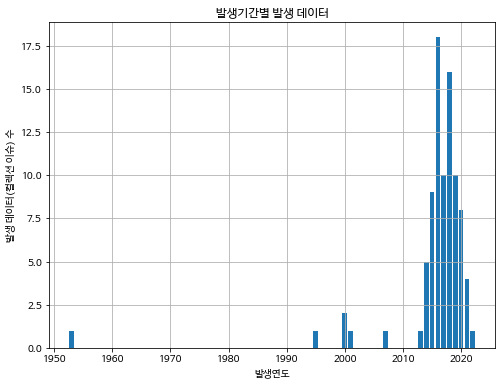

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(col_by_year['발생연도'], col_by_year['size'])
plt.title('발생기간별 발생 데이터')
plt.xlabel('발생연도')
plt.ylabel('발생 데이터(컬렉션 이슈) 수')
plt.grid()
plt.show()

In [ ]:
# 2010년대 이전과 이후로 나누기(더욱 직관적인 그래프를 그리기 위함)
from datetime import datetime

col_bf_10s = collections[collections['발생기간'] < datetime(2010, 1, 1)]
col_af_10s = collections[collections['발생기간'] >= datetime(2010, 1, 1)]

발생기간별로 발생한 데이터(컬렉션 이슈)의 수를 시각화한 결과, 2010년대 이후에 발생한 이슈의 컬렉션이 전체의 대부분을 차지한다.  
오아시스 사업이 2004년부터 시작되었다는 사실을 바탕으로 2000년대 이후의 이슈들이 주로 다뤄졌다는 것을 추론할 수 있다.  

## 3-2. 주제별 컬렉션 수

In [ ]:
# 주제별 컬렉션 수 보기
collection_num_by_subject = pd.DataFrame(oasis[['대주제', '소주제', '제목']].groupby(['대주제', '소주제']).size())
collection_num_by_subject.rename(columns={0:'컬렉션 수'}, inplace=True)
collection_num_by_subject

컬렉션 수
대주제  소주제                      
기술과학 공학,공업일반,토목공학,환경공학       1
     기계공학                    2
     전기공학,통신공학,전자공학          1
문학   한국문학                    2
사회과학 경제학                     6
     국방,군사학                  1
     사회과학                    1
     사회학,사회문제                8
     정치학                    27
     행정학                     4
역사   아시아                     7
     지리                      2
예술   공연예술,매체예술               2
     예술                      1
     오락,스포츠                 13
     회화,도화,디자인               1
자연과학 지학                      2
총류   문헌정보학                   2
     신문,저널리즘                 2
     일반학회,단체,협회,기관,연구기관      2
     총류                      1

In [ ]:
# 대주제만 보기
collection_num_by_bSub = pd.DataFrame(oasis[['대주제', '제목']].groupby('대주제').size())
collection_num_by_bSub.rename(columns={0:'컬렉션 수'}, inplace=True)
collection_num_by_bSub

,컬렉션 수
대주제,
기술과학,4
문학,2
사회과학,47
역사,9
예술,17
자연과학,2
총류,7


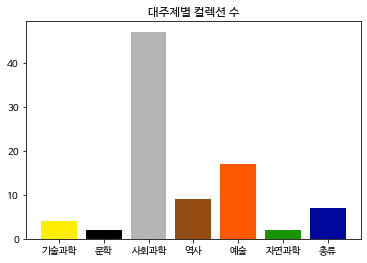

<Figure size 720x720 with 0 Axes>

In [ ]:
# 대주제별 컬렉션 수
colors = ['#FFED02', '#000000', '#B5B5B5', '#954C12', '#FF5802', '#179400', '#00099B']

plt.bar(collection_num_by_bSub.index, collection_num_by_bSub['컬렉션 수'], color=colors)
plt.xticks()
plt.title('대주제별 컬렉션 수')
plt.figure(figsize=(10,10))
plt.show()

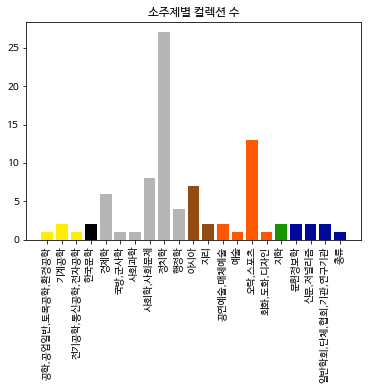

<Figure size 720x720 with 0 Axes>

In [ ]:
# 소주제별 컬렉션 수
x=[]
for i in collection_num_by_subject.index:
  a = i[1]
  x.append(a)

colors_s = ['#FFED02', '#FFED02', '#FFED02', 
            '#000000', 
            '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', 
            '#954C12', '#954C12', 
            '#FF5802', '#FF5802', '#FF5802', '#FF5802', 
            '#179400', 
            '#00099B', '#00099B', '#00099B', '#00099B']

plt.bar(x, collection_num_by_subject['컬렉션 수'], color=colors_s)
plt.xticks(rotation=90)
plt.title('소주제별 컬렉션 수')
plt.figure(figsize=(10,10))
plt.show()

대주제, 소주제별로 컬렉션 수를 시각화한 결과를 보면, 사회과학 특히, 정치학 주제에 컬렉션 주제가 치우쳐 있음을 알 수 있다.

또한 문학과 자연과학 주제는 컬렉션 수가 매우 적다.

이와같은 주제별 컬렉션 수 분포는 이후 진행될 모든 분석에 참고해야 하는 기초 자료이다.

## 3-3. 평균 수집기간

In [ ]:
collect_period = pd.DataFrame(oasis[['제목', '수집기간:시작일', '수집기간:종료일']])

collect_period_list = []
for start, end in zip(collect_period['수집기간:시작일'], oasis['수집기간:종료일']):
  collect_period_list += ((end-start).days + 1,)

collect_period['수집기간(일)'] = collect_period_list

collect_period.head()

,제목,수집기간:시작일,수집기간:종료일,수집기간(일)
0,2022년 20대 대통령선거(20대 대선),2021-09-01,2022-02-26,179
1,제16회 도쿄 패럴림픽,2021-07-05,2021-11-07,126
2,2021년 대한민국 재보궐선거 (4·7 재보궐선거),2021-07-05,2021-11-17,136
3,제32회 2020 도쿄올림픽,2020-11-03,2021-11-17,380
4,문화콘텐츠,2022-01-27,2022-12-31,339


In [ ]:
# 이상치 발견
print(collect_period_list)
print(collect_period_list.index(-63))

# 수집기간 시작일이 종료일보다 늦음
print(collect_period[['수집기간:시작일', '수집기간:종료일']].loc[49])

# 오아시스 찾아보니 홈페이지에도 이렇게 써있음 -> 홈페이지 자체 오류 -> 0으로 수정하고 진행
collect_period.loc[49, '수집기간(일)'] = None
print(collect_period.loc[49])

[179, 126, 136, 380, 339, 609, 537, 165, 111, 146, 101, 94, 31, 131, 42, 26, 57, 14, 90, 15, 9, 5, 12, 5, 11, 8, 18, 11, 5, 5, 26, 11, 49, 10, 32, 44, 3996, 8, 10, 19, 31, 74, 94, 86, 31, 1, 92, 5, 31, -63, 28, 24, 26, 32, 9, 15, 16, 31, 51, 1, 31, 16, 9, 15, 13, 7, 22, 122, 545, 2, 52, 4, 65, 6, 22, 13, 127, 39, 36, 36, 17, 5, 1, 413, 1, 210, 128, 10]
49
수집기간:시작일   2017-11-09
수집기간:종료일   2017-09-06
Name: 49, dtype: datetime64[ns]
제목           2016년 트럼프 미 대통령 당선
수집기간:시작일    2017-11-09 00:00:00
수집기간:종료일    2017-09-06 00:00:00
수집기간(일)                     NaN
Name: 49, dtype: object


In [ ]:
cp_avg = np.mean(collect_period['수집기간(일)'])
print(f"평균 수집기간 : {int(cp_avg)}일")

평균 수집기간 : 118일


In [ ]:
cp_max = np.max(collect_period['수집기간(일)'])
cp_min = np.min(collect_period['수집기간(일)'])
print(f"최대 수집기간 : {int(cp_max)}일")
print(f"최소 수집기간 : {int(cp_min)}일")

최대 수집기간 : 3996일
최소 수집기간 : 1일


오아시스의 컬렉션에는 데이터를 수집한 기간이 명시되어 있다.  
모든 컬렉션의 평균 수집 기간은 116일이며, 최대 수집기간은 3,996일, 최소 수집기간은 1일이다.

## 3-4. 관련주제별 평균 수집기간

In [ ]:
# 대주제별 평균 수집기간
big_cp = pd.DataFrame(oasis['대주제'])
big_cp['수집기간(일)'] = collect_period['수집기간(일)']
big_cp = big_cp.groupby('대주제', as_index = False).mean()
big_cp

,대주제,수집기간(일)
0,기술과학,142.250000
1,문학,19.000000
2,사회과학,47.760870
3,역사,48.777778
4,예술,326.882353
5,자연과학,577.000000
6,총류,44.857143


In [ ]:
big_cp_avg = np.mean(big_cp['수집기간(일)'])
big_cp_avg_list = []
for i in range(len(big_cp)):
  big_cp_avg_list.append(big_cp_avg)

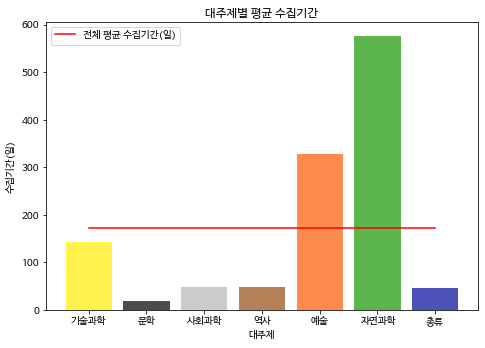

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])

colors = ['#FFED02', '#000000', '#B5B5B5', '#954C12', '#FF5802', '#179400', '#00099B']

line = ax.plot(range(len(big_cp)), big_cp_avg_list, 'r', label='전체 평균 수집기간(일)')
bar = ax.bar(big_cp['대주제'], big_cp['수집기간(일)'], color=colors, alpha=0.7)

ax.set_title('대주제별 평균 수집기간')
ax.set_xlabel('대주제')
ax.set_ylabel('수집기간(일)')
ax.legend(loc='upper left')

plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# 소주제
small_cp = pd.DataFrame(oasis['소주제'])
small_cp['수집기간(일)'] = collect_period['수집기간(일)']
small_cp = small_cp.groupby('소주제', as_index = False).mean()
small_cp

,소주제,수집기간(일)
0,경제학,30.000000
1,"공연예술,매체예술",214.500000
2,"공학,공업일반,토목공학,환경공학",5.000000
3,"국방,군사학",39.000000
4,기계공학,274.000000
5,문헌정보학,120.500000
6,사회과학,74.000000
7,"사회학,사회문제",75.125000
8,"신문,저널리즘",14.000000
9,아시아,59.571429


In [ ]:
# 소주제별 평균 수집기간: 그래프용(대주제별 색 구분 위한 순서 정렬ver.)
small_cp = pd.DataFrame(oasis[['대주제','소주제']])
small_cp['수집기간(일)'] = collect_period['수집기간(일)']
small_cp = small_cp.groupby(['대주제', '소주제'], as_index = False).mean()
#small_cp

In [ ]:
small_cp_avg = np.mean(small_cp['수집기간(일)'])
small_cp_avg_list = []
for i in range(len(small_cp)):
  small_cp_avg_list.append(small_cp_avg)

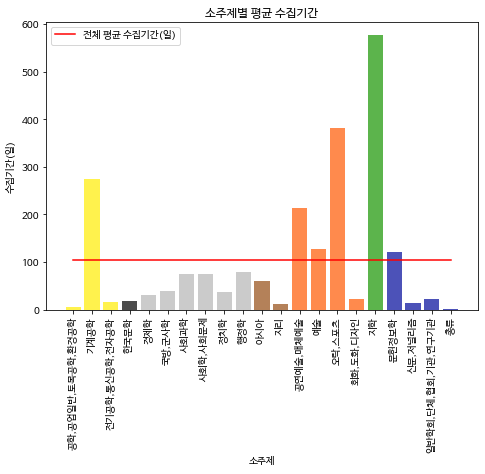

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])

colors_s = ['#FFED02', '#FFED02', '#FFED02', 
            '#000000', 
            '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', 
            '#954C12', '#954C12', 
            '#FF5802', '#FF5802', '#FF5802', '#FF5802', 
            '#179400', 
            '#00099B', '#00099B', '#00099B', '#00099B']

line = ax.plot(range(len(small_cp)), small_cp_avg_list, 'r', label='전체 평균 수집기간(일)') 
bar = ax.bar(small_cp['소주제'], small_cp['수집기간(일)'], color=colors_s, alpha=0.7)

ax.set_title('소주제별 평균 수집기간')
ax.set_xlabel('소주제')
ax.set_ylabel('수집기간(일)')
plt.xticks(rotation=90)
ax.legend(loc='upper left')

plt.figure(figsize=(10,10))
plt.show()

컬렉션의 평균 수집기간을 대주제, 소주제별로 시각화한 결과, 자연과학과 예술 분야 특히, 지학과 오락,스포츠 주제의 데이터가 오랫동안 수집되었음을 알 수 있다.  
지학 주제의 경우,  '기후변화'와 '녹색미래' 두 가지 컬렉션이 있는데, 두 컬렉션 모두 1년 이상의 수집기간을 가져 해당 주제의 평균 수집기간이 길게 나타난 것으로 보인다.  
오락, 스포츠 주제의 경우, 올림픽이나 월드컵 등 세계적인 대회와 관련된 컬렉션이 많은데, 우리나라에서 개최된 대회(평창 동계 올림픽 등)의 데이터가 유치 시점부터 대회 종료 시점까지 수집되어 해당 주제의 평균 수집기간을 늘린 것으로 보인다.  


## 3-5. 평균 설명글 길이

In [ ]:
content = pd.DataFrame(oasis[['제목', '내용']])
content['길이'] = [len(x) for x in content['내용']]
content['줄수'] = [len(x.split('.'))for x in content['내용']]
content.head()

,제목,내용,길이,줄수
0,2022년 20대 대통령선거(20대 대선),제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 ...,411,15
1,제16회 도쿄 패럴림픽,2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로...,774,19
2,2021년 대한민국 재보궐선거 (4·7 재보궐선거),"2020년 7월 10일 박원순 전 서울시장의 임기 중 사망, 오거돈 전 부산시장 자...",1086,25
3,제32회 2020 도쿄올림픽,2021년 7월 23일부터 8월 8일까지 일본 도쿄에서 열린 제32회 하계올림픽으로...,1500,25
4,문화콘텐츠,“한류가 아시아와 그 너머 다른 국가들에서도 한국의 문화적 영향력을 확산시켜 한국을...,1259,24


In [ ]:
content_average = np.mean(content['길이'])
line_average = np.mean(content['줄수'])
print(f"평균 설명글 길이 : {int(content_average)}자")
print(f"평균 설명글 줄수 : {int(line_average)}줄")

평균 설명글 길이 : 755자
평균 설명글 줄수 : 18줄


오아시스의 컬렉션에는 해당 이슈를 간단히 소개하는 설명글이 작성되어 있다.  
모든 컬렉션의 평균 설명글 길이는 755자이며, 평균 설명글 줄수는 18줄이다.  
이를 통해 후에 진행할 텍스트 분석에서 사용될 설명글의 평균을 확인할 수 있다.

## 3-6. 관련주제별 설명글 길이

In [ ]:
content = pd.DataFrame(oasis[['제목', '대주제', '소주제', '내용']])
content.head()

,제목,대주제,소주제,내용
0,2022년 20대 대통령선거(20대 대선),사회과학,행정학,제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 ...
1,제16회 도쿄 패럴림픽,예술,"오락,스포츠",2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로...
2,2021년 대한민국 재보궐선거 (4·7 재보궐선거),사회과학,행정학,"2020년 7월 10일 박원순 전 서울시장의 임기 중 사망, 오거돈 전 부산시장 자..."
3,제32회 2020 도쿄올림픽,예술,"오락,스포츠",2021년 7월 23일부터 8월 8일까지 일본 도쿄에서 열린 제32회 하계올림픽으로...
4,문화콘텐츠,예술,"공연예술,매체예술",“한류가 아시아와 그 너머 다른 국가들에서도 한국의 문화적 영향력을 확산시켜 한국을...


In [ ]:
print(content['내용'].values[0:3])

['제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 이상의 국민으로 선거권이 확장된 이래 두 번째로 치르는 선거이며, 대통령선거로는 첫 번째 선거이다. 선거일에 투표할 수 없는 국민은 사전투표기간(2022.3.4.~3.5.)에 전국 사전투표소 어디에서나 투표할 수 있다. 제20대 대통령 당선인의 임기는 2022년 5월 10일부터 2027년 5월 9일까지로 만 5년이다.\n20대 대선 컬렉션은 중앙선거관리위원회, 주요언론의 20대 대선 특집 웹페이지 등 관련 기관의 웹사이트 및 이미지·동영상·보도자료 등으로 구성되어 있다.\n\n<출처>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/vt/ex/bbs/View.do?cbIdx=1235&bcIdx=151531&relCbIdx=1147)'
 '2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로, 코로나19의 전 세계 확산으로 1년 연기돼 개막되었다. 참가국은 당초 181개국에서 163개국으로 줄었는데, 코로나19의 여파로 사모아, 통가 등이 참가를 포기했고, 그 외 일부 국가들이 국내외 사정을 이유로 불참을 알렸다. 불참국 중에서 이슬람 무장단체 탈레반이 정권을 재장악한 아프가니스탄이 눈길을 끌었다.\n도쿄 패럴림픽은 22개 종목 540개 경기가 열렸는데, 태권도가 처음으로 패럴림픽에 채택된 대회가 되었다. 대한민국은 이 대회에 14개 종목 86명의 선수가 참가했다. 임원단까지 합하면 총 159명이 참가한 것으로, 이는 역대 대회 최대 규모였다. 우리나라 선수단은 금메달 2개, 은메달 10개, 동메달 12개로 종합순위 41위의 성적을 거두는 등 선전하였다. 다만 우리나라 선수들의 평균 나이가 평균 40.5세로 15명 넘게 출전한 나라에서 평균 나이가 제일 많았다는 점이 지적되기도 했다.\n\n제16회 도쿄 패럴림픽 컬렉션은 대한장애인체육회 공식사이트 및 각종 언론의 특집, 기획 웹사이트, 대회 관련 언론 보도자료 등으로 구성되

In [ ]:
# '내용' 컬럼 속 '출처' 컬럼 삭제

contents = []
for i in list(content['내용'].values):
  num = i.find('<출처>')
  if num == -1:
    contents.append(i)
  else:
    contents.append(i[:num].rstrip())

print(contents)

['제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 이상의 국민으로 선거권이 확장된 이래 두 번째로 치르는 선거이며, 대통령선거로는 첫 번째 선거이다. 선거일에 투표할 수 없는 국민은 사전투표기간(2022.3.4.~3.5.)에 전국 사전투표소 어디에서나 투표할 수 있다. 제20대 대통령 당선인의 임기는 2022년 5월 10일부터 2027년 5월 9일까지로 만 5년이다.\n20대 대선 컬렉션은 중앙선거관리위원회, 주요언론의 20대 대선 특집 웹페이지 등 관련 기관의 웹사이트 및 이미지·동영상·보도자료 등으로 구성되어 있다.', '2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로, 코로나19의 전 세계 확산으로 1년 연기돼 개막되었다. 참가국은 당초 181개국에서 163개국으로 줄었는데, 코로나19의 여파로 사모아, 통가 등이 참가를 포기했고, 그 외 일부 국가들이 국내외 사정을 이유로 불참을 알렸다. 불참국 중에서 이슬람 무장단체 탈레반이 정권을 재장악한 아프가니스탄이 눈길을 끌었다.\n도쿄 패럴림픽은 22개 종목 540개 경기가 열렸는데, 태권도가 처음으로 패럴림픽에 채택된 대회가 되었다. 대한민국은 이 대회에 14개 종목 86명의 선수가 참가했다. 임원단까지 합하면 총 159명이 참가한 것으로, 이는 역대 대회 최대 규모였다. 우리나라 선수단은 금메달 2개, 은메달 10개, 동메달 12개로 종합순위 41위의 성적을 거두는 등 선전하였다. 다만 우리나라 선수들의 평균 나이가 평균 40.5세로 15명 넘게 출전한 나라에서 평균 나이가 제일 많았다는 점이 지적되기도 했다.\n\n제16회 도쿄 패럴림픽 컬렉션은 대한장애인체육회 공식사이트 및 각종 언론의 특집, 기획 웹사이트, 대회 관련 언론 보도자료 등으로 구성되어 있다.', '2020년 7월 10일 박원순 전 서울시장의 임기 중 사망, 오거돈 전 부산시장 자진사퇴 등으로 인해, 재보궐선거가 실시되었다.\n재보궐선거는 2021년 4월 7일 실시되었

In [ ]:
# print 결과 중 링크 포함 '출처' 성격 내용 발견, 수정
print(contents[45])
print('\n\n-----수정-----')

rep = contents[45]
num = contents[45].find('\n\n<참고자료>\n')
contents[45] = rep[:num]
source_45 = rep[num+7:]

print(contents[45])

2017년 4월 5일 행정자치부(장관 홍윤식)는 국민이 가장 사랑하는 대표적인 정부혁신 행정서비스 30선을 발표했다. 정부혁신 행정서비스 30선이란 국민의 삶을 더욱 편리하고 안락하게 만드는 데 기여한 정부의 혁신행정서비스 중 국민의 선택을 받은 30개의 서비스를 말한다. 전 행정기관(중앙부처‧자치단체‧교육청)과 공공기관이 제출한 대표적 정부혁신(정부3.0) 사례 670여 건을 대상으로 2017년 3월 15일부터 2017년 3월 28일 동안 전문가 심사와 국민투표(공식 누리집(govbrand30.kr)활용)를 병행하여 조사가 실시되었으며, 총 1만7천여 명이 조사에 참여하였다.

국민이 뽑은 정부혁신 행정서비스 30선은 브랜드 명 가나다순으로 다음과 같다.
<개인투약이력조회서비스, 고용복지센터, 공공데이터 포털, 긴급신고전화(112,119) 통합서비스, 농촌형 교통 선도모델 : 청송군 농어촌버스 미운행마을 「천원택시, 대한민국 구석구석, 드론을 활용한 산림재해 현장대응 강화, 마을변호사 제도, 문서 24, 민원24 ‘나의 생활정보’서비스, 보이스피싱 지킴이 “그놈목소리”, 서민자녀 생애주기별 맞춤형 교육지원 서비스, 서울시 심야콜버스, 성범죄자 알림e, 스마트119 상황관제시스템, 신고서미리채움(Pre-filled)서비스 : 연말정산 포함, 안전신문고, 운전면허 신체검사 간소화 서비스, 워크넷, 원문정보공개, 유실물정보 통합시스템 ‘Lost112’, 일사편리 : 부동산 행정정보 일원화, 정보3.0 수입물품 안전관리 협업검사, 정부3.0 안심상속 원스톱서비스, 정부3.0 행복출산 원스톱서비스, 취약계층 요금감면 원스톱서비스, 취업맞춤형 특기병제도, 통계로 찾은 ‘살고 싶은 우리동네’, 통합 연금포털, 화학재난합도방제센터>
「2017년 국민이 뽑은 정부혁신 행정서비스 30선」 에는 고용복지+센터, 공공데이터 포털, 긴급신고전화(112,119) 통합서비스, 대한민국구석구석 등 17개 웹사이트를 비롯해 기존에 수집했던 웹자원을 모아 제공하며, 신규 웹자원을 추가 수집

In [ ]:
content['내용'] = contents
print(content['내용'].values[0:3])

['제20대 대통령선거가 2022년 3월 9일 실시된다. 제20대 대통령선거는 18세 이상의 국민으로 선거권이 확장된 이래 두 번째로 치르는 선거이며, 대통령선거로는 첫 번째 선거이다. 선거일에 투표할 수 없는 국민은 사전투표기간(2022.3.4.~3.5.)에 전국 사전투표소 어디에서나 투표할 수 있다. 제20대 대통령 당선인의 임기는 2022년 5월 10일부터 2027년 5월 9일까지로 만 5년이다.\n20대 대선 컬렉션은 중앙선거관리위원회, 주요언론의 20대 대선 특집 웹페이지 등 관련 기관의 웹사이트 및 이미지·동영상·보도자료 등으로 구성되어 있다.'
 '2021년 8월 24일 9월 5일까지 일본 도쿄에서 열린 제16회 하계 패럴림픽으로, 코로나19의 전 세계 확산으로 1년 연기돼 개막되었다. 참가국은 당초 181개국에서 163개국으로 줄었는데, 코로나19의 여파로 사모아, 통가 등이 참가를 포기했고, 그 외 일부 국가들이 국내외 사정을 이유로 불참을 알렸다. 불참국 중에서 이슬람 무장단체 탈레반이 정권을 재장악한 아프가니스탄이 눈길을 끌었다.\n도쿄 패럴림픽은 22개 종목 540개 경기가 열렸는데, 태권도가 처음으로 패럴림픽에 채택된 대회가 되었다. 대한민국은 이 대회에 14개 종목 86명의 선수가 참가했다. 임원단까지 합하면 총 159명이 참가한 것으로, 이는 역대 대회 최대 규모였다. 우리나라 선수단은 금메달 2개, 은메달 10개, 동메달 12개로 종합순위 41위의 성적을 거두는 등 선전하였다. 다만 우리나라 선수들의 평균 나이가 평균 40.5세로 15명 넘게 출전한 나라에서 평균 나이가 제일 많았다는 점이 지적되기도 했다.\n\n제16회 도쿄 패럴림픽 컬렉션은 대한장애인체육회 공식사이트 및 각종 언론의 특집, 기획 웹사이트, 대회 관련 언론 보도자료 등으로 구성되어 있다.'
 '2020년 7월 10일 박원순 전 서울시장의 임기 중 사망, 오거돈 전 부산시장 자진사퇴 등으로 인해, 재보궐선거가 실시되었다.\n재보궐선거는 2021년 4월 7일 실시되었

In [ ]:
# 대주제별 설명글 길이 평균
big_cont = content[['대주제', '내용']].copy()
big_cont['길이'] = [len(x) for x in content['내용'].values.tolist()]
big_cont = big_cont.groupby('대주제', as_index = False).mean()
big_cont

,대주제,길이
0,기술과학,806.500000
1,문학,460.500000
2,사회과학,588.680851
3,역사,463.000000
4,예술,557.235294
5,자연과학,862.000000
6,총류,329.285714


In [ ]:
# 전체 설명글 길이 평균구하기, 그래프 그리기 위한 list 값 개수 맞추기
big_cont_avg = np.mean(big_cont['길이'])
big_cont_avg_list = []
for i in range(len(big_cont)):
  big_cont_avg_list.append(big_cont_avg)

print(big_cont_avg, '\n', len(big_cont_avg_list))

581.0288370667416 
 7


<ipython-input-37-671cbb9d45d1>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, list(big_cont['대주제'].values))


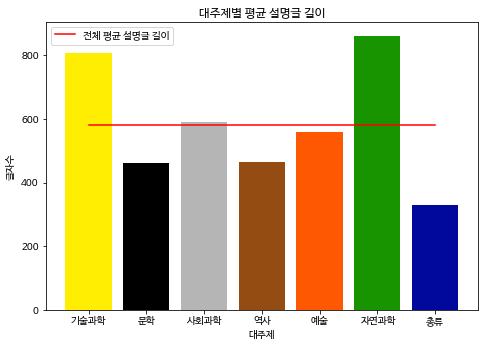

<Figure size 720x720 with 0 Axes>

In [ ]:
x = np.arange(len(big_cont))

fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])

colors = ['#FFED02', '#000000', '#B5B5B5', '#954C12', '#FF5802', '#179400', '#00099B']

line = ax.plot(range(len(big_cont)), big_cont_avg_list, 'r', label='전체 평균 설명글 길이')
bar = ax.bar(big_cont['대주제'], big_cont['길이'], color=colors)

ax.set_title('대주제별 평균 설명글 길이')
ax.set_xlabel('대주제')
ax.set_ylabel('글자수')
ax.set_xticks(x, list(big_cont['대주제'].values))
ax.legend()

plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# 소주제별 설명글 길이 평균 보기
small_cont = content[['대주제', '소주제', '내용']].copy().sort_values(by='대주제')
small_cont['길이'] = [len(x) for x in content['내용'].values.tolist()]
small_cont = small_cont.groupby('소주제', as_index = False).mean()
small_cont

,소주제,길이
0,경제학,569.500000
1,"공연예술,매체예술",390.000000
2,"공학,공업일반,토목공학,환경공학",580.000000
3,"국방,군사학",485.000000
4,기계공학,1165.000000
5,문헌정보학,903.500000
6,사회과학,263.000000
7,"사회학,사회문제",460.375000
8,"신문,저널리즘",534.000000
9,아시아,744.428571


In [ ]:
# 소주제별 설명글 길이 평균: 그래프용(대주제별 색 구분 위한 순서 정렬ver.)
small_cont = content[['대주제', '소주제', '내용']].copy().sort_values(by='대주제')
small_cont['길이'] = [len(x) for x in content['내용'].values.tolist()]
small_cont = small_cont.groupby(['대주제', '소주제'], as_index = False).mean()

In [ ]:
# 소주제별 전체 설명글 길이 평균구하기, 그래프 그리기 위한 list 값 개수 맞추기
small_cont_avg = np.mean(small_cont['길이'])
small_cont_avg_list = []
for i in range(len(small_cont)):
  small_cont_avg_list.append(small_cont_avg)

print(small_cont_avg, '\n', len(small_cont_avg_list))

549.4781309959881 
 21


In [ ]:
#대주제별 평균 그래프를 그리기 위해 list에 담긴 값 개수를 맞춤.
rep = [3, 1, 6, 2, 4, 1, 4]   #반복 횟수

big_cont_list = []
value = list(big_cont['길이'].values)

ft = 0
for i in rep:
  v = value[ft]
  ft += 1
  t = 0
  while t < i:
    big_cont_list.append(v)
    t += 1

big_cont_list

[806.5,
 806.5,
 806.5,
 460.5,
 588.6808510638298,
 588.6808510638298,
 588.6808510638298,
 588.6808510638298,
 588.6808510638298,
 588.6808510638298,
 463.0,
 463.0,
 557.2352941176471,
 557.2352941176471,
 557.2352941176471,
 557.2352941176471,
 862.0,
 329.2857142857143,
 329.2857142857143,
 329.2857142857143,
 329.2857142857143]

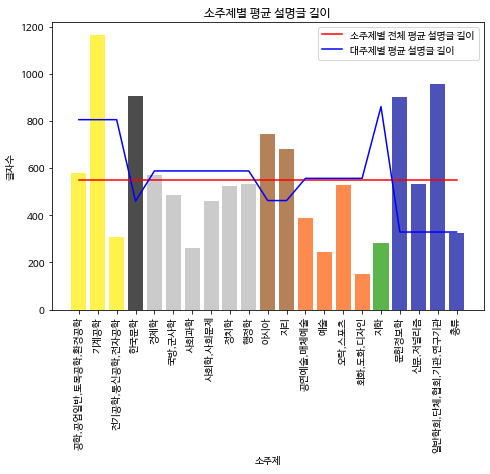

<Figure size 720x720 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])


colors_s = ['#FFED02', '#FFED02', '#FFED02', 
            '#000000', 
            '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', '#B5B5B5', 
            '#954C12', '#954C12', 
            '#FF5802', '#FF5802', '#FF5802', '#FF5802', 
            '#179400', 
            '#00099B', '#00099B', '#00099B', '#00099B']

line = ax.plot(range(len(small_cont)), small_cont_avg_list, 'r', label='소주제별 전체 평균 설명글 길이')
line2 = ax.plot(range(len(small_cont)), big_cont_list, color='blue', label='대주제별 평균 설명글 길이')
bar = ax.bar(small_cont['소주제'], small_cont['길이'], color=colors_s, alpha=0.7)

ax.set_title('소주제별 평균 설명글 길이')
ax.set_xlabel('소주제')
ax.set_ylabel('글자수')

plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.show()

대주제별 설명글 길이는 평균이 자연과학>기술과학>사회과학 순으로 길다. 과학 분야는 전문인 외의 사람에게 익숙하지 않은 맥락과 이론을 포함하기 때문으로 추측할 수 있다.

주제분야별 설명글 길이의 평군 분량을 통해 텍스트 분석에서 과대표될 수 있는 주제를 확인하고 결과 해석에 참고할 수 있다.

---

소주제별 설명글 길이 평균은 각 소주제별로 컬렉션이 하나, 두 개 포함되어 있는 경우도 있어 주제 하에 배정된 컬렉션 수에 따라 값 차가 크고, 데이터 형태를 분석하기에 적절하지 않다. 따라서 단순히 참고용으로 삼는 것이 적절해 보인다.

cf. 소주제별 평균의 평균은 전체 설명글 길이를 대상으로 평균을 구했을 때보다 적은 값이다.

cf. 대주제별 평균과 소주제별 평균을 비교하면 데이터 분포를 파악하는 데 도움이 될 수 있다.

## 3-7. 관련주제별 데이터셋 개수

In [ ]:
dataset = oasis[['제목', '대주제', '소주제', '수집건수_웹사이트', '수집건수_문서', '수집건수_동영상', '수집건수_이미지']].sort_values(by='대주제')
dataset.head()

,제목,대주제,소주제,수집건수_웹사이트,수집건수_문서,수집건수_동영상,수집건수_이미지
61,4차 산업혁명,기술과학,"전기공학,통신공학,전자공학",113,129,17,1
81,미세먼지,기술과학,"공학,공업일반,토목공학,환경공학",359,34,58,4
6,누리호,기술과학,기계공학,38,0,0,0
27,BMW 주행 중 화재,기술과학,기계공학,460,13,9,43
57,"2016년 한강 작가, 맨부커상 인터내셔널부문 수상",문학,한국문학,50,1,12,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 61 to 44
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   제목         88 non-null     object
 1   대주제        88 non-null     object
 2   소주제        88 non-null     object
 3   수집건수_웹사이트  88 non-null     object
 4   수집건수_문서    88 non-null     int64 
 5   수집건수_동영상   88 non-null     int64 
 6   수집건수_이미지   88 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.5+ KB


In [ ]:
#'수집건수_웹사이트'와 '수집건수_이미지' 열은 string임.
# 수 타입으로 변환
dataset['수집건수_웹사이트'] = dataset['수집건수_웹사이트'].str.replace(',', '')
dataset['수집건수_이미지'] = dataset['수집건수_이미지'].str.replace(',', '')
dataset = dataset.astype({'수집건수_웹사이트':'int', '수집건수_이미지':'int'})

dataset[['수집건수_웹사이트', '수집건수_이미지']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 61 to 44
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   수집건수_웹사이트  88 non-null     int64
 1   수집건수_이미지   88 non-null     int64
dtypes: int64(2)
memory usage: 2.1 KB


In [ ]:
dSsum = []
for idx, val in dataset.iterrows():
  sum_ = val['수집건수_웹사이트']+val['수집건수_문서']+val['수집건수_동영상']+val['수집건수_이미지']
  dSsum.append(sum_)

dataset['총_수집건수'] = dSsum
dataset

,제목,대주제,소주제,수집건수_웹사이트,수집건수_문서,수집건수_동영상,수집건수_이미지,총_수집건수
61,4차 산업혁명,기술과학,"전기공학,통신공학,전자공학",113,129,17,1,260
81,미세먼지,기술과학,"공학,공업일반,토목공학,환경공학",359,34,58,4,455
6,누리호,기술과학,기계공학,38,0,0,0,38
27,BMW 주행 중 화재,기술과학,기계공학,460,13,9,43,525
57,"2016년 한강 작가, 맨부커상 인터내셔널부문 수상",문학,한국문학,50,1,12,0,63
...,...,...,...,...,...,...,...,...
48,2017년 국제회의 및 컨퍼런스,총류,"일반학회,단체,협회,기관,연구기관",122,76,14,3,215
64,2016년 국제회의 및 컨퍼런스,총류,"일반학회,단체,협회,기관,연구기관",23,29,8,0,60
63,2016년 10대 뉴스,총류,"신문,저널리즘",294,14,0,0,308
75,2015년 10대 뉴스,총류,"신문,저널리즘",295,29,1,1,326


In [ ]:
# 대주제별로 자료유형/전체 평균 데이터 수집 건수 보기
dataset_mean = dataset.groupby('대주제', as_index = False).mean()
dataset_mean

,대주제,수집건수_웹사이트,수집건수_문서,수집건수_동영상,수집건수_이미지,총_수집건수
0,기술과학,242.500000,44.000000,21.000000,12.000000,319.500000
1,문학,105.000000,4.000000,13.500000,0.500000,123.000000
2,사회과학,462.234043,70.914894,36.723404,18.297872,588.170213
3,역사,605.111111,111.555556,9.777778,255.777778,982.222222
4,예술,612.705882,45.411765,67.764706,19.470588,745.352941
5,자연과학,487.500000,173.500000,8.000000,3.500000,672.500000
6,총류,189.000000,22.000000,3.285714,0.571429,214.857143


In [ ]:
data_sum = list(dataset['총_수집건수'].values)
data_mean = sum(data_sum)/len(data_sum)

print(data_mean)

608.2727272727273


In [ ]:
#평균 그래프를 그리기 위해 list에 담긴 값 개수를 맞춤.
i = 0
data_means = []
while i < 88:
  data_means.append(data_mean)
  i += 1

len(data_means)

88

In [ ]:
#대주제별 평균 그래프를 그리기 위해 list에 담긴 값 개수를 맞춤.

#반복 횟수
rep = [int(i) for i in list(dataset.groupby('대주제').size().values)]

data_sub_means = []
value = list(dataset_mean['총_수집건수'].values)

ft = 0
for i in rep:
  v = value[ft]
  ft += 1
  t = 0
  while t < i:
    data_sub_means.append(v)
    t += 1

data_sub_means

[319.5,
 319.5,
 319.5,
 319.5,
 123.0,
 123.0,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 588.1702127659574,
 982.2222222

In [ ]:
# xticks에 들어갈 값 정제하기

x_label = []
label = list(dataset_mean['대주제'].values)

ft = 0
for i in rep:
  lab = label[ft]
  x_label.append(lab)
  ft += 1
  t = 1
  while t < i:
    x_label.append('')
    t += 1

x_label

['기술과학',
 '',
 '',
 '',
 '문학',
 '',
 '사회과학',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '역사',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '예술',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '자연과학',
 '',
 '총류',
 '',
 '',
 '',
 '',
 '',
 '']

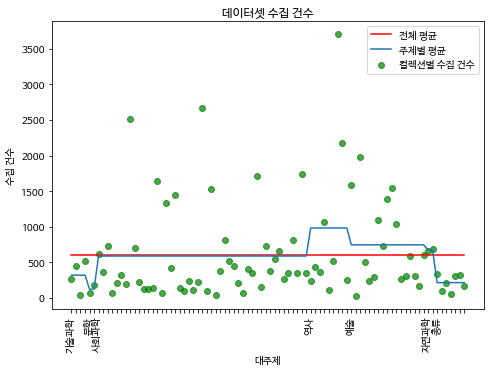

<Figure size 720x720 with 0 Axes>

In [ ]:
collections = list(dataset['제목'].values)

x = np.arange(len(collections))

fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])

dot = ax.scatter(collections, data_sum, c="green", label='컬렉션별 수집 건수', alpha=0.7)
line = ax.plot(range(len(collections)), data_means, 'r', label='전체 평균')
line2 = ax.plot(range(len(collections)), data_sub_means, label='주제별 평균')

ax.set_title('데이터셋 수집 건수')
ax.set_xlabel('대주제')
ax.set_ylabel('수집 건수')
ax.legend()

plt.xticks(x, x_label, rotation=90)

plt.figure(figsize=(10,10))
plt.show()

In [ ]:
# 대주제별 수집된 데이터셋 수 총합

data_sub_sum = dataset.groupby('대주제')['총_수집건수'].sum().reset_index(name = '전체_수집건수')
data_sub_sum

,대주제,전체_수집건수
0,기술과학,1278
1,문학,246
2,사회과학,27644
3,역사,8840
4,예술,12671
5,자연과학,1345
6,총류,1504


<ipython-input-54-38d7b4a1d7b4>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, list(data_sub_sum['대주제']))


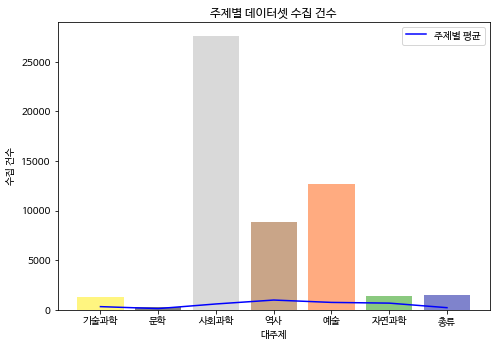

<Figure size 720x720 with 0 Axes>

In [ ]:
x = np.arange(7)

fig, ax = plt.subplots()

ax = fig.add_axes([0,0,1,1])

colors = ['#FFED02', '#000000', '#B5B5B5', '#954C12', '#FF5802', '#179400', '#00099B']

line = ax.plot(dataset_mean['대주제'], dataset_mean['총_수집건수'], color='blue', label='주제별 평균')
bar = ax.bar(data_sub_sum['대주제'], data_sub_sum['전체_수집건수'], color=colors, alpha=0.5)

ax.set_title('주제별 데이터셋 수집 건수')
ax.set_xlabel('대주제')
ax.set_ylabel('수집 건수')
ax.set_xticks(x, list(data_sub_sum['대주제']))
ax.legend()

plt.figure(figsize=(10,10))
plt.show()

오아시스 컬렉션이 수집한 데이터셋의 수를 주제별로 비교해 보았다.

컬렉션 당 데이터셋 수집 건수는 대체로 1000건 이하이고, 사회과학, 역사, 예술 관련 컬렉션이 많은 수의 데이터셋을 수집, 포함하고 있다.

두번째 그래프는 대주제별 데이터셋 수집 수의 총합과 평균을 함께 나타냈다.

데이터 수집량의 수준은 역사>예술>자연과학 순이나, 데이터 수의 순수한 총합은 사회과학 주제분야의 데이터 수집량이 다음으로 수집량이 많은 예술보다도 2배 가까이 많은 것을 알 수 있다. 이는 사회과학 분야에 컬렉션 수가 많고 많은 양의 데이터를 수집한 컬렉션도 여럿 포함돼 있기 때문으로 보인다.

## 3-8. 제공 유형별 데이터 개수 (웹사이트, 문서, 동영상, 이미지)

In [ ]:
data_y = [dataset['수집건수_웹사이트'].mean(), dataset['수집건수_문서'].mean(), dataset['수집건수_동영상'].mean(), dataset['수집건수_이미지'].mean()]
data_x = ['웹사이트', '문서', '동영상', '이미지']

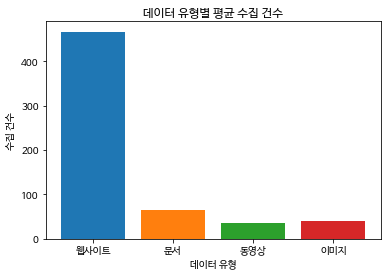

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.bar(data_x, data_y, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.title('데이터 유형별 평균 수집 건수')
plt.xlabel('데이터 유형')
plt.ylabel('수집 건수')
plt.xticks()
plt.figure(figsize=(10,10))
plt.show()

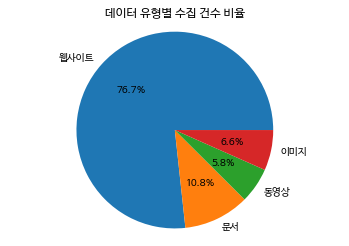

<Figure size 720x720 with 0 Axes>

In [ ]:
sizes = [dataset['수집건수_웹사이트'].sum()/dataset['총_수집건수'].sum(),
         dataset['수집건수_문서'].sum()/dataset['총_수집건수'].sum(),
         dataset['수집건수_동영상'].sum()/dataset['총_수집건수'].sum(),
         dataset['수집건수_이미지'].sum()/dataset['총_수집건수'].sum()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=data_x, autopct='%1.1f%%')
ax1.axis('equal')

plt.title('데이터 유형별 수집 건수 비율')
plt.figure(figsize=(10,10))
plt.show()

오아시스가 수집한 데이터를 자료 유형으로 나누어 비교해보았다.

첫 그래프는 컬렉션 별로 수집된 웹사이트, 문서, 동영샹, 이미지 자료의 수를 각각 평균내어 비교한 것이다. 한 컬렉션 내에서 평균적으로 웹사이트는 500건 가까이, 문서는 약 70건, 동영상은 약 40건, 이미지는 약 50건씩 수집되었다.

둘째 그래프는 전체 데이터셋에서 각 유형의 데이터가 차지하는 비율이다. 컬렉션 당 유형별 데이터 수집 건수와 비슷한 양상이다.

오아시스는 온라인 디지털자원 아카이브이다. 새로운 정보자원 유형인 디지털자원을 수집, 보존하려는 목적의 아카이브라 이전까지 잘 다루어지지 않던 정보자원 유형인 웹사이트 수집량이 가장 많은 것으로 보인다.

## 3-9. 출처가 된 웹사이트 순위

In [ ]:
sources = oasis['출처'].values
sources
# 서로 다른 출처 간에 \n 하나 이상 있음.
# 링크를 식별자 삼는 건 힘들어 보임.
# '.' 또는 '/', ',' 있으면 문서(뉴스, 조사 보고서 등) cf.','는 제목 중간에도 들어감.
# '(링크)' 있으면 웹사이트

array(['>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/vt/ex/bbs/View.do?cbIdx=1235&bcIdx=151531&relCbIdx=1147)',
       '>\n국제패럴림픽위원회(https://www.paralympic.org/)\n대한장애인체육회\n(https://www.koreanpc.kr/sports/list.do?per_menu_idx=75&tabCnt=2&menu_idx=80)\n네이버 시사상식사전(https://terms.naver.com/entry.naver?docId=4390805)',
       '>\n중앙선거관리위원회\n(https://www.nec.go.kr/site/nec/main.do)',
       '>\n도쿄올림픽 공식홈페이지(https://olympics.com/ko/olympic-games/tokyo-2020)\n도쿄2020 메달순위(https://olympics.com/ko/olympic-games/tokyo-2020/medals)\n네이버 시사상식사전(https://terms.naver.com/entry.naver?docId=5781644)',
       '>\n한국콘텐츠진흥원(https://www.kocca.kr/cop/bbs/view/B0158950/1845713.do)\n문화체육관광부 해외문화홍보원(https://www.kocis.go.kr/koreanet/view.do?seq=1040417)',
       '>\n기후변화센터\n(http://www.climatechangecenter.kr/)\n국가기후변화적응정보포털\n(https://kaccc.kei.re.kr/portal/)\n기상청 기후정보포털\n(http://www.climate.go.kr/home/index.php)',
       '>\n다음백과(https://100.daum.net/encyclopedia/view/124XX57000009)\nKAIST 인공위성연구소(http://satrec.kais

In [ ]:
sources[45]   # oasis.loc[45]에서 출처는 NaN

nan

In [ ]:
sources[45] = source_45   # 관련주제별 설명글 길이 분석에서 분리한 출처 삽입

sources[45]

">\n-‘국민들이 가장 사랑하는 정부혁신 행정서비스 30선' / 행정자치부. 2017.04.05.\n(https://www.moi.go.kr/frt/bbs/type010/commonSelectBoardArticle.do?bbsId=BBSMSTR_000000000008&nttId=58084)"

In [ ]:
#아주 정확하지는 않더라도 중복되는 출처를 확인하고 출처 순위를 매겨보기

#출처 분리
spl_source = []
for i in sources:
  a = str(i).split('\n')
  b = []
  for v in a:
    b.append(v.replace('- ', ''))
  spl_source.append(b[1:])

spl_source

[['중앙선거관리위원회',
  '(https://www.nec.go.kr/site/vt/ex/bbs/View.do?cbIdx=1235&bcIdx=151531&relCbIdx=1147)'],
 ['국제패럴림픽위원회(https://www.paralympic.org/)',
  '대한장애인체육회',
  '(https://www.koreanpc.kr/sports/list.do?per_menu_idx=75&tabCnt=2&menu_idx=80)',
  '네이버 시사상식사전(https://terms.naver.com/entry.naver?docId=4390805)'],
 ['중앙선거관리위원회', '(https://www.nec.go.kr/site/nec/main.do)'],
 ['도쿄올림픽 공식홈페이지(https://olympics.com/ko/olympic-games/tokyo-2020)',
  '도쿄2020 메달순위(https://olympics.com/ko/olympic-games/tokyo-2020/medals)',
  '네이버 시사상식사전(https://terms.naver.com/entry.naver?docId=5781644)'],
 ['한국콘텐츠진흥원(https://www.kocca.kr/cop/bbs/view/B0158950/1845713.do)',
  '문화체육관광부 해외문화홍보원(https://www.kocis.go.kr/koreanet/view.do?seq=1040417)'],
 ['기후변화센터',
  '(http://www.climatechangecenter.kr/)',
  '국가기후변화적응정보포털',
  '(https://kaccc.kei.re.kr/portal/)',
  '기상청 기후정보포털',
  '(http://www.climate.go.kr/home/index.php)'],
 ['다음백과(https://100.daum.net/encyclopedia/view/124XX57000009)',
  'KAIST 인공위성연구소(http://satrec.

In [ ]:
#출처 링크 제거(이름만 남기기)
source = []
for i in spl_source:
  for v in i:
    if '(http' in v:
      a = v[:v.find('(http')]
      source.append(a.strip())
    else:
      source.append(v.strip())

source

['중앙선거관리위원회',
 '',
 '국제패럴림픽위원회',
 '대한장애인체육회',
 '',
 '네이버 시사상식사전',
 '중앙선거관리위원회',
 '',
 '도쿄올림픽 공식홈페이지',
 '도쿄2020 메달순위',
 '네이버 시사상식사전',
 '한국콘텐츠진흥원',
 '문화체육관광부 해외문화홍보원',
 '기후변화센터',
 '',
 '국가기후변화적응정보포털',
 '',
 '기상청 기후정보포털',
 '',
 '다음백과',
 'KAIST 인공위성연구소',
 '대한민국 정책브리핑',
 '',
 '정책주간지 공감',
 '',
 '한국항공우주연구원 한국형발사체누리호',
 '6·25전쟁 70주년 사업추진위원회 홈페이지',
 '네이버 시사상식사전',
 '대한체육회 체육포털',
 '',
 '5\uf09e18기념재단 홈페이지',
 '5\uf09e18민주화운동기록관 홈페이지',
 '대한민국 정책브리핑 정책위키 부동산 정책',
 '',
 '다음백과',
 '대한민국 정책브리핑 정책위키 디지털 성범죄',
 '네이버 시사상식사전',
 '',
 '중앙선거관리위원회 홈페이지',
 'KBS 선거특집사이트',
 'SBS 선거특집사이트',
 'MBC 선거특집사이트',
 '네이버 시사상식사전',
 '',
 '청와대 홈페이지',
 '외교부 홈페이지',
 '다음백과',
 '2019 광주 FINA 세계수영선수권대회 홈페이지',
 '대법원 홈페이지',
 '청와대 홈페이지',
 '외교부 홈페이지',
 '청와대 홈페이지',
 '외교부 홈페이지',
 'FIFA U-20 월드컵 홈페이지',
 '대한축구협회 U-20 국가대표팀 홈페이지',
 '한국영화진흥위원회 홈페이지',
 '한국영화 100년 기념사업 홈페이지',
 '3.1운동 및 임시정부 100주년 위원회 홈페이지',
 '청와대 홈페이지',
 '외교부 홈페이지',
 '전통시장 통통',
 '대한민국 구석구석(korean.visitkorea.or.kr/main/main.do)',
 '청와대 홈페이지',
 '외교부 홈페이지',
 '2018 남북정상회담 평양 ‘평화, 새로

In [ ]:
df = pd.DataFrame(source)
df = df[df[0] != '']
src = pd.DataFrame(df[0].value_counts())
src

,0
외교부 홈페이지,7
네이버 시사상식사전,5
청와대 홈페이지,5
다음백과,5
통일부 남북회담본부,4
...,...
김정남 암살(2017) / 네이버 지식백과,1
"알아두면 유익한 ‘새해 이렇게 달라집니다’, 기획재정부 정책브리핑, 2016.12.28.",1
주한미국대사관 및 영사관,1
외교부(www.mofa.go.kr ),1


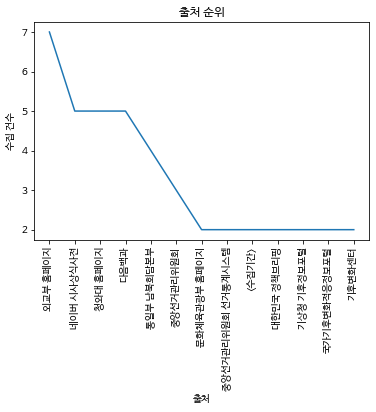

<Figure size 1440x288 with 0 Axes>

In [ ]:
plt.plot(src[src[0]>1].index, src[src[0]>1])   #2회 이상 출현한 출처만 시각화
plt.title('출처 순위')
plt.xlabel('출처')
plt.ylabel('수집 건수')
plt.xticks(rotation=90)
plt.figure(figsize=(20,4))
plt.show()

오아시스 컬렉션 설명을 작성하는 데 가장 많이 이용된 웹사이트(자료)의 순위를 밝혀 보았다. 그러나  출처 순위에 '<수집기간>'과 같은 항목이 있는데서 드러나듯 데이터 정제가 충분하지 못했고, 또한 원데이터도 정제하기에 어려운 형태*였다. 따라서 이 분석 결과는 낮은 신뢰도를 가지며, 실험적 시도의 성격이 강하다.

*정제하기 어려운 원데이터 형태: 일정하지 않은 기술 방식: 모기관, 하위기관 작성 방식이 ' ', '/', '. ' 등으로 다양하고 모기관-하위기관 순, 하위기관-모기관 순 등 통일되지 않음. / 한 정보원에 대해 작성자마다 다른 방식으로 기입함.(ex: 외교부 홈페이지에 대해 '외교부', '외교부 홈페이지' 등 다양한 표기) / 출처를 모기관 단위에서 표기하기도, 하위기관 단위에서 표기하기도 하는 등 통일성 부족.

---

분석 결과를 훑어보자면, 외교부 홈페이지가 7회로 가장 많이 인용되었고, 네이버 시사상식사전, 청와대 홈페이지, 다음백과가 5회로 그 다음이다.

대부분 정부 운영 사이트가 많아 오아시스 컬렉션의 신뢰도를 높이 평가할 수 있지만, 높은 순위에 일반 포털사이트 사전도 있어 의문점이 있다.

주제별 컬렉션 수에서 보았듯, 사회과학, 그중에서도 정치 주제와 관련해 컬렉션이 많고, 수집된 데이터 수도 많다. 정부 운영 사이트가 다회 인용된 이유는 컬렉션의 주제적 편향이 영향을 미쳤을 것으로 보인다.

## EDA 결론

국립중앙도서관 오아시스의 데이터셋은 2000년대 이후 이슈와 '사회과학' 주제에 과도하게 치우쳐져 있다. '디지털 지적 문화유산을 국가적 차원에서 수집·보존하여 후대에 제공할 목적'에 맞게 과거의 이슈와 더 다양한 주제의 이슈를 추가적으로 다루는 것이 중요할 것이라 생각한다.  

뿐만 아니라 데이터 유형에 있어서도 웹사이트 형태에 비중이 치우쳐 있는데, 온라인상의 디지털 정보의 휘발성은 어떤 형태의 자료이든 높기 때문에 자료 유형을 막론하고 의미 있는 데이터라면 고루 수집하는 노력이 필요해 보인다.

그럼에도 오아시스 구축과 운영은 새로운 정보 환경에 적응하고 꾸준히 질 높은 정보 서비스를 제공하기 위한 뜻깊은 노력이다. 앞으로 도서관계가 온라인 디지털 환경을 적극 다루어야 할 상황에서, 국가대표도서관으로서 방향성을 제시하고 본보기를 제공하는 행동을 높이 산다.

# 4. 텍스트 마이닝

## 4-1. 빈도수 분석 및 빈도수 워드클라우드

### 4-1-1. 연도별 다빈도 단어 분석

### 4-1-2. 주제별 다빈도 단어 분석

#### (1) 기술과학

#### (2) 자연과학

#### (3) 사회과학

#### (4) 역사

#### (5) 문학

#### (6) 예술

#### (7) 총류

## 4-2. 토픽 모델링

### 4-2-1. K-Means

#### 4-2-1-0. 데이터 전처리 및 벡터화

#### 4-2-1-1. 1차 클러스터 형성 : OASIS 주제 그룹 개수 (7개)

#### 4-2-1-2. 적정 클러스터 개수 탐색

##### (1) Elbow Method

##### (2) Silhouette Score

#### 4-2-1-3. 2차 클러스터 형성

##### (1) Elbow Method 결과 활용

##### (2) Silhouette Score 결과 활용

### 4-2-2. LDA